<a href="https://colab.research.google.com/github/bandofpv/USNA-Robotics-Courses/blob/main/EW442/Project_4_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Data Cleaning
## Google Colab Version

EW442: Artificial Intelligence & Data Science in Robotics

**Your Name:** Andrew Bernas

**Libraries used:** `pandas`, `numpy`, `matplotlib` (no additional libraries required).

**Data file:** `AdvertisingMessy.csv`

**Instructions:**
1. Upload `AdvertisingMessy.csv` to your Colab session using the file browser in the left sidebar
2. Complete each TODO section below
3. Answer the qualitative questions in the separate markdown document

---


In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Data path for Colab (file in current directory)
DATA_PATH = 'AdvertisingMessy.csv'

# Alternative: If using Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# DATA_PATH = '/content/drive/MyDrive/path/to/AdvertisingMessy.csv'


## Step 1–2: Import & Preview

In [344]:
# Load CSV file
df = pd.read_csv(DATA_PATH)
df.head(10)

,Date,Facebook,Instagram,TikTok,Sales,AdType,Product Line,Ad Manager POC
0,9/1/2010,300.2,-1,-1,12.3,A,1,410 293 6135
1,10/1/2010,271.3,Did Not Exist,DNE,15.3,B,1,410-293-7220
2,1/1/1900,230.1,37.8,69.2,22.1,???,1,4102937220
3,12/1/2010,44.5,39.3,0,10.4,NaN,1,UNKNOWN
4,1/1/2011,17.9,44.1,60,???,?,1,(410) 293-7220
5,NaN,17.2,45.9,69.3,9.3,B,1,410 293 6135
6,2/1/2011,151.5,41.3,58.5,18.5,a,1,?
7,NaN,2022.0,15.1,44.2,11.1,A or B,1,410.293.6135
8,4/1/2011,180.8,10.8,58.4,12.9,b,1,410 293 6135
9,5/1/2011,8.7,48.9,75,7.2,NaN,1,(410) 293-7220


## Step 3: Quick Profile

In [345]:
# View datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            166 non-null    object 
 1   Facebook        205 non-null    float64
 2   Instagram       205 non-null    object 
 3   TikTok          204 non-null    object 
 4   Sales           205 non-null    object 
 5   AdType          201 non-null    object 
 6   Product Line    205 non-null    int64  
 7   Ad Manager POC  205 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 12.9+ KB


In [346]:
# Describe dataframe
df.describe(include='all')

,Date,Facebook,Instagram,TikTok,Sales,AdType,Product Line,Ad Manager POC
count,166,205.000000,205,204,205,201,205.0,205
unique,164,NaN,172,176,124,8,NaN,8
top,1/1/1900,NaN,4.1,25.6,9.7,B,NaN,410 293 6135
freq,3,NaN,3,3,5,104,NaN,141
mean,NaN,166.350732,NaN,NaN,NaN,NaN,1.0,NaN
std,NaN,203.972154,NaN,NaN,NaN,NaN,0.0,NaN
min,NaN,0.700000,NaN,NaN,NaN,NaN,1.0,NaN
25%,NaN,74.700000,NaN,NaN,NaN,NaN,1.0,NaN
50%,NaN,151.500000,NaN,NaN,NaN,NaN,1.0,NaN
75%,NaN,222.400000,NaN,NaN,NaN,NaN,1.0,NaN


In [347]:
# Count empty data entries
df.isna().sum()

,0
Date,39
Facebook,0
Instagram,0
TikTok,1
Sales,0
AdType,4
Product Line,0
Ad Manager POC,0


## Step 4: Standardize Missing Values (dataset-specific)

In [348]:
# Replace unknown data entries
df = df.replace(['?', '???', '1/1/1900', 'DNE', 'Did Not Exist',
                           '-1', 'UNKNOWN', 'A or B', '0', 'none', 'inf'
                           'unknown', 'None', 'empty', 'NA', 'N/A'], np.nan)

# Convert Date column into datatime
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Convert TikTok and Instagram to numberic
df['Instagram'] = pd.to_numeric(df['Instagram'], errors='coerce')
df['TikTok'] = pd.to_numeric(df['TikTok'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            162 non-null    datetime64[ns]
 1   Facebook        205 non-null    float64       
 2   Instagram       202 non-null    float64       
 3   TikTok          201 non-null    float64       
 4   Sales           203 non-null    object        
 5   AdType          197 non-null    object        
 6   Product Line    205 non-null    int64         
 7   Ad Manager POC  203 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 12.9+ KB


In [349]:
# Count empty data entries
df.isna().sum()

,0
Date,43
Facebook,0
Instagram,3
TikTok,4
Sales,2
AdType,8
Product Line,0
Ad Manager POC,2


## Step 5: Remove Zero-Variance Variables & Plot Sales vs Product Line (robust)

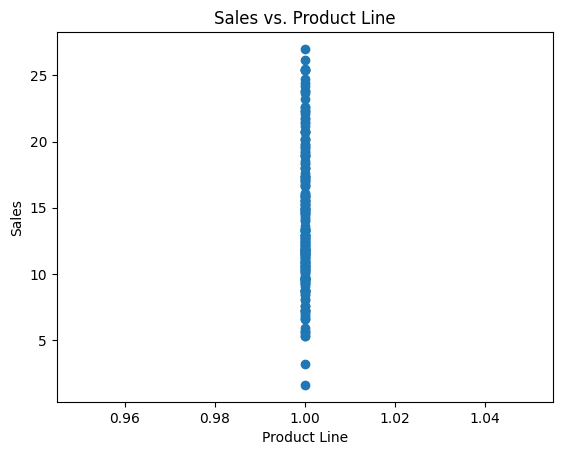

In [350]:
# Convert Sales and Product Line columns to numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Product Line'] = pd.to_numeric(df['Product Line'], errors='coerce')

# Filter out empty data entries
df_filtered = df[df['Product Line'].notna() & df['Sales'].notna()]

# Plot Salves vs. Product Line
plt.scatter(df_filtered['Product Line'], df_filtered['Sales'])
plt.title('Sales vs. Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.show()

In [351]:
# Identify columns with only one unique value and drop them
unique_cols = df.columns[df.nunique() == 1]
df = df.drop(columns=unique_cols)

df.head()

,Date,Facebook,Instagram,TikTok,Sales,AdType,Ad Manager POC
0,2010-09-01,300.2,NaN,NaN,12.3,A,410 293 6135
1,2010-10-01,271.3,NaN,NaN,15.3,B,410-293-7220
2,NaT,230.1,37.8,69.2,22.1,NaN,4102937220
3,2010-12-01,44.5,39.3,NaN,10.4,NaN,NaN
4,2011-01-01,17.9,44.1,60.0,NaN,NaN,(410) 293-7220


## Step 6: Remove Rows with Missing Sales

In [352]:
df = df.dropna(subset=['Sales'])
df.isna().sum()

,0
Date,43
Facebook,0
Instagram,3
TikTok,4
Sales,0
AdType,7
Ad Manager POC,2


## Step 7: Handle Outliers (Facebook, IQR method)

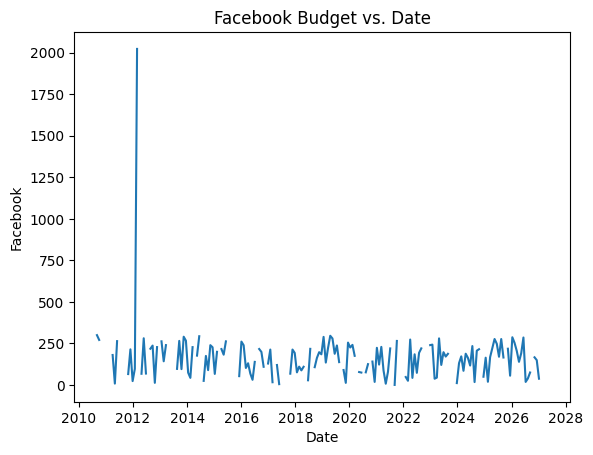

In [353]:
# Plot Facbook Budget vs. Date
plt.plot(df['Date'], df['Facebook'])
plt.title('Facebook Budget vs. Date')
plt.xlabel('Date')
plt.ylabel('Facebook')
plt.show()

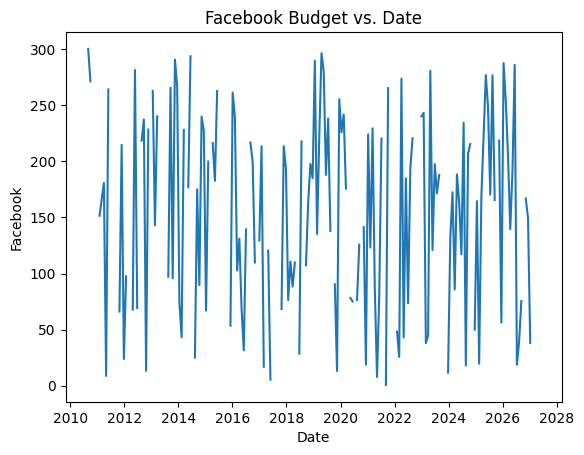

In [354]:
# IQR method
q1, q3 = df['Facebook'].quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

# Remove outliers
df = df[(df['Facebook'] >= lower) & (df['Facebook'] <= upper)]

# Plot Facbook Budget vs. Date
plt.plot(df['Date'], df['Facebook'])
plt.title('Facebook Budget vs. Date')
plt.xlabel('Date')
plt.ylabel('Facebook')
plt.show()

## Step 8: Interpolate Missing Dates (Monthly, aggregate duplicates first)

In [355]:
# Copy df for modifying
df_numerical = df.copy()

# Bucket rows to monthly start and collapse duplicates
df_numerical = df_numerical.set_index('Date').resample('MS').mean(numeric_only=True)

# Create a full monthly index from min to max date
full_idx = pd.date_range(start=df_numerical.index.min(), end=df_numerical.index.max(), freq='MS')

# Reindex to include all months
df_numerical = df_numerical.reindex(full_idx)

# Interpolate missing numerical values
df_numerical = df_numerical.interpolate(method='linear')

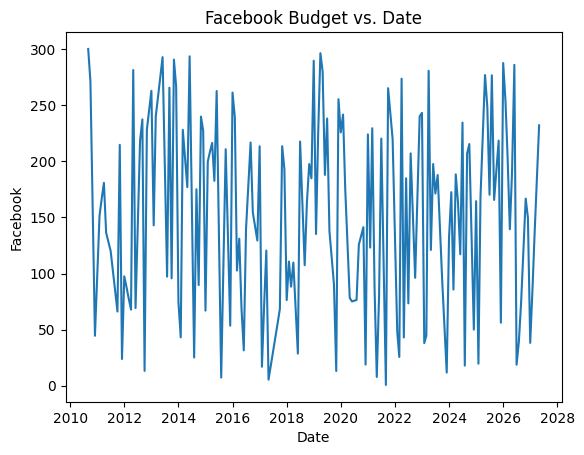

In [356]:
# Plot Facebook Budget vs. Date
plt.plot(df_numerical['Facebook'])
plt.title('Facebook Budget vs. Date')
plt.xlabel('Date')
plt.ylabel('Facebook')
plt.show()

## Step 9: Fill Instagram & TikTok Missing with 0 (pre-platform assumption)

In [357]:
# Fill in missing values to 0
df_numerical['Instagram'] = df_numerical['Instagram'].fillna(0)
df_numerical['TikTok'] = df_numerical['TikTok'].fillna(0)

df_numerical.head()

,Facebook,Instagram,TikTok,Sales
2010-09-01,300.2,0.0,0.0,12.30
2010-10-01,271.3,0.0,0.0,15.30
2010-11-01,157.9,0.0,0.0,12.85
2010-12-01,44.5,39.3,0.0,10.40
2011-01-01,98.0,40.3,0.0,14.45


## Step 10: Categorical Cleanup – AdType

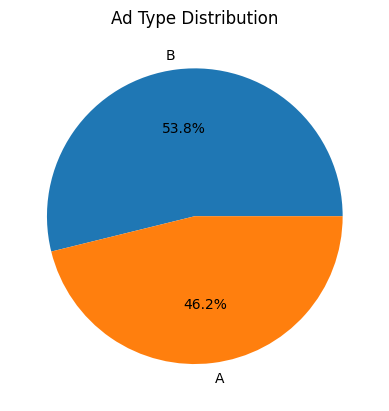

In [358]:
# Standardize text
df['AdType'] = df['AdType'].str.upper()

# Convert to categorical
df['AdType'] = df['AdType'].astype('category')

# Visualize the distribution
plt.pie(df['AdType'].value_counts(), labels=df['AdType'].value_counts().index, autopct='%.1f%%')
plt.title('Ad Type Distribution')
plt.show()

## Step 11: Categorical Cleanup – Ad Manager POC

In [359]:
# Standardize phone numbers (digits only)
df['Ad Manager POC'] = df['Ad Manager POC'].str.replace('[^0-9]', '', regex=True)

# Convert phone numbers to categorical
df['Ad Manager POC'] = df['Ad Manager POC'].astype('category')

df.head()

,Date,Facebook,Instagram,TikTok,Sales,AdType,Ad Manager POC
0,2010-09-01,300.2,NaN,NaN,12.3,A,4102936135
1,2010-10-01,271.3,NaN,NaN,15.3,B,4102937220
2,NaT,230.1,37.8,69.2,22.1,NaN,4102937220
3,2010-12-01,44.5,39.3,NaN,10.4,NaN,NaN
5,NaT,17.2,45.9,69.3,9.3,B,4102936135


## Step 12: Compare Managers – Sales (Top Two by Count)

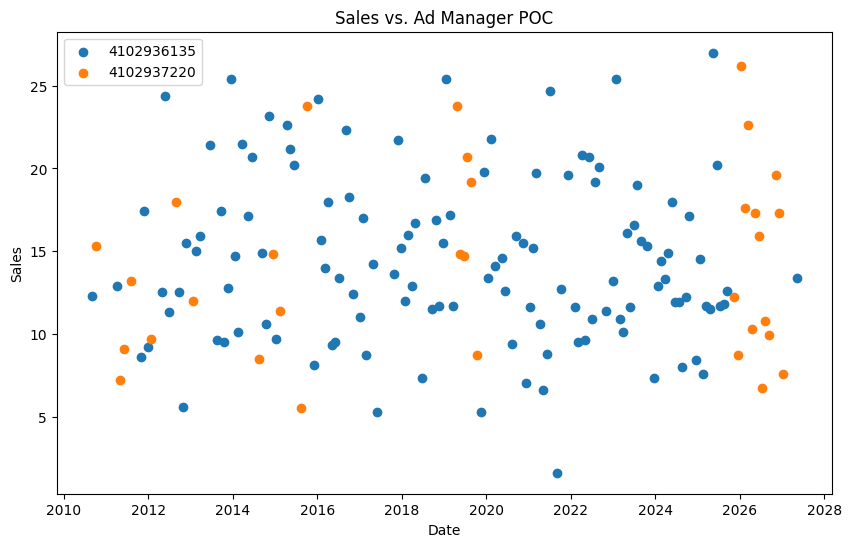

In [360]:
# Extract rows of top two Ad Manager POCs
top_two = df['Ad Manager POC'].value_counts().nlargest(2)
top_two_df = df[df['Ad Manager POC'].isin(top_two.index)]

# Drop out rows without a date
top_two_df.dropna(subset=['Date'])

# Plot Sales vs. Ad Manager POC for each manager separately
plt.figure(figsize=(10, 6))
for manager in top_two.index:
    manager_data = top_two_df[top_two_df['Ad Manager POC'] == manager]
    plt.scatter(manager_data['Date'], manager_data['Sales'], label=manager)

plt.title('Sales vs. Ad Manager POC')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()